<a href="https://colab.research.google.com/github/henilshah101/Python-Projects/blob/main/Fifa_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import scipy as sp
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
fifa = pd.read_csv("/content/drive/MyDrive/Data Mining Project/FifaDataset.csv",encoding='cp1252')
fifa.head()

Mounted at /content/drive


,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [ ]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

We have 12.4 MB's dataset. It includes three kind of datatypes: float, int and object.

In [ ]:
fifa.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18207.0,9103.000000,5256.052511,0.0,4551.5,9103.0,13654.5,18206.0
ID,18207.0,214298.338606,29965.244204,16.0,200315.5,221759.0,236529.5,246620.0
Age,18207.0,25.122206,4.669943,16.0,21.0,25.0,28.0,45.0
Overall,18207.0,66.238699,6.908930,46.0,62.0,66.0,71.0,94.0
Potential,18207.0,71.307299,6.136496,48.0,67.0,71.0,75.0,95.0
Special,18207.0,1597.809908,272.586016,731.0,1457.0,1635.0,1787.0,2346.0
International Reputation,18159.0,1.113222,0.394031,1.0,1.0,1.0,1.0,5.0
Weak Foot,18159.0,2.947299,0.660456,1.0,3.0,3.0,3.0,5.0
Skill Moves,18159.0,2.361308,0.756164,1.0,2.0,2.0,3.0,5.0
Jersey Number,18147.0,19.546096,15.947765,1.0,8.0,17.0,26.0,99.0


In [ ]:
fifa.shape

(18207, 89)

So, We have a total of 18,207 rows & 89 columns, which includes 45 categorical features and 44 numerical features.

In [ ]:
#checking all columns

fifa.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [ ]:
print('Number of Categorical Columns: ', len(fifa.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(fifa.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  45
Number of Numerical Columns:  44


In [ ]:
#Checking unique values in each column
fifa.nunique()

Unnamed: 0        18207
ID                18207
Name              17194
Age                  29
Photo             18207
                  ...  
GKHandling           70
GKKicking            79
GKPositioning        79
GKReflexes           76
Release Clause     1244
Length: 89, dtype: int64

In [ ]:
fifa.isnull().any()

Unnamed: 0        False
ID                False
Name              False
Age               False
Photo             False
                  ...  
GKHandling         True
GKKicking          True
GKPositioning      True
GKReflexes         True
Release Clause     True
Length: 89, dtype: bool



  **After understanding the basic description of our data, we now go ahead with the cleaning, EDA and preprocessing part.**







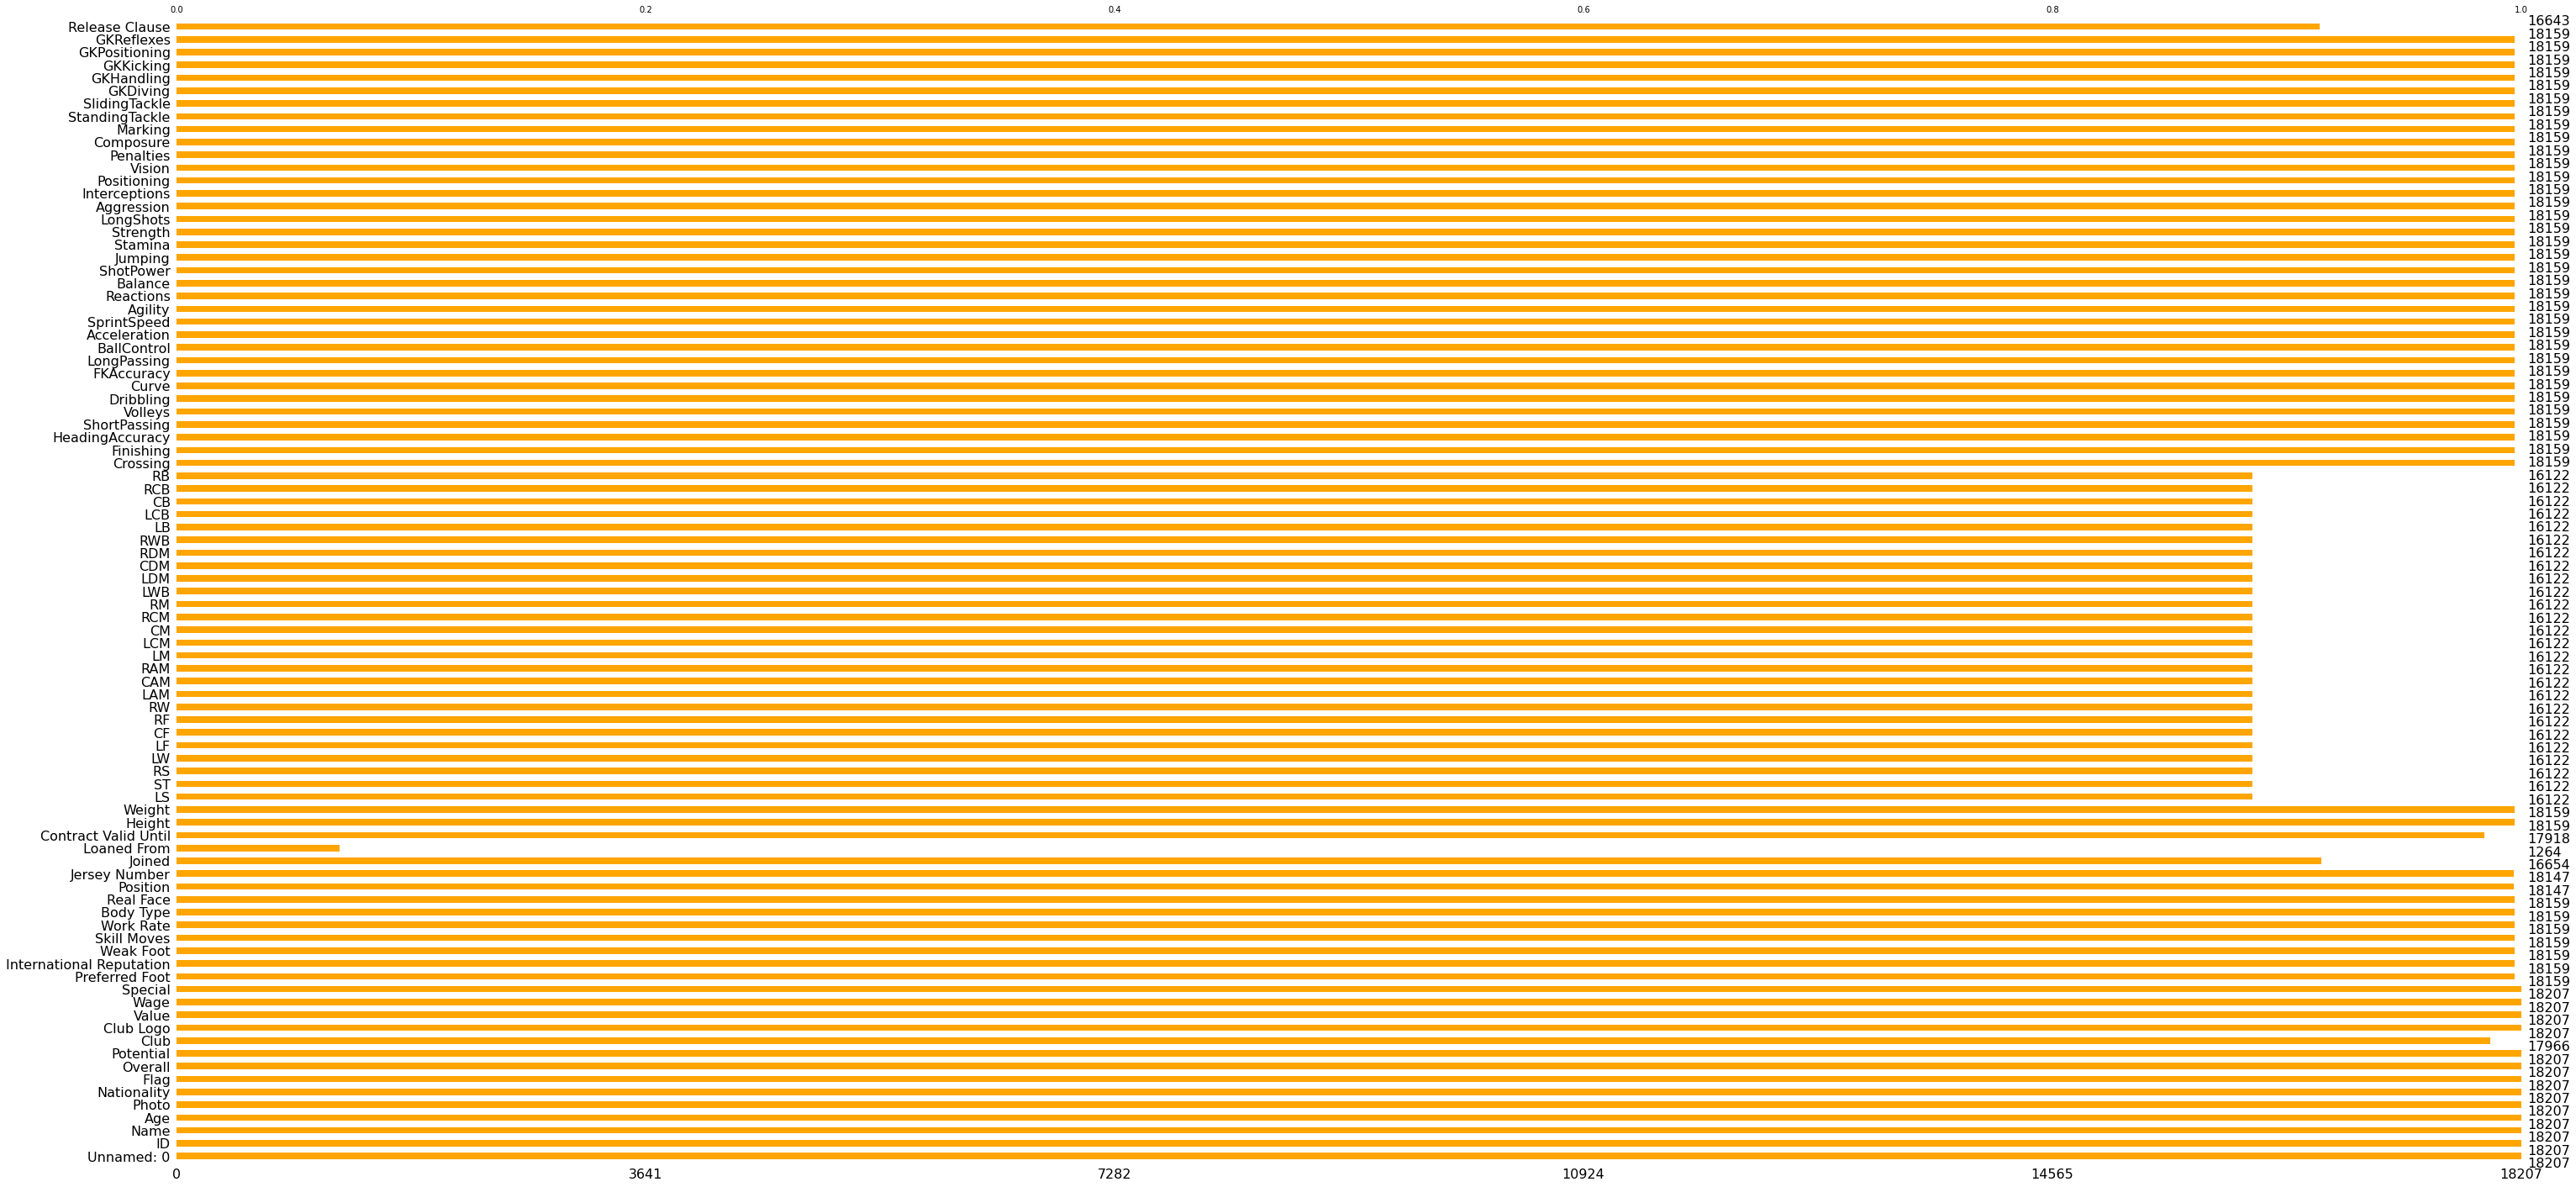

In [ ]:
msno.bar(fifa.sample( 18207 ),(50,25),color='orange')

In the above graph, we see that the columns RB to LS have same number of missing values.
And, the variable 'Loaned From' has most of the values missing in the column, which is obvious because not every player is loaned in their football career.

In [ ]:

fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

48 is repeating many times. Let's check if the same rows are null throughout all these columns

In [ ]:
missing_1 = fifa[fifa['GKHandling'].isnull()].index.tolist()
missing_2 = fifa[fifa['GKReflexes'].isnull()].index.tolist()
if missing_1 == missing_2:
    print('They are same')
else:
    print('They are different')

They are same


As they are same we can confidently assume that it will be same for other all columns too.

In [ ]:
fifa.drop(fifa.index[missing_1],inplace =True)

In [ ]:
fifa.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling           0
GKKicking            0
GKPositioning        0
GKReflexes           0
Release Clause    1516
Length: 89, dtype: int64

We assumed it correctly and now we have fewer null values as we can see.

In [ ]:
#Removing the other columns that have major null values, and are not significant for our classification analysis.

fifa.drop(['Loaned From','Release Clause','Joined'],axis=1,inplace=True)

Let's see the best player as per all the different performance attributes mentioned in the dataframe:-

In [ ]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('Best player in different aspects:')

i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],fifa.loc[fifa[pr_cols[i]].idxmax()]['Name']))
    i += 1

Best player in different aspects:
Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modri?
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Best GKReflexes : De Gea


**Converting categorical features to appropriate numerical features**

In [ ]:
# Function to convert value and wage of the player.

def currencyConverter(val):
    if val[-1] == 'M':
        val = val[1:-1]
        val = float(val) * 1000000
        return val
        
    elif val[-1] == 'K':
        val = val[1:-1]
        val = float(val) * 1000
        return val
    
    else:
        return 0

In [ ]:
fifa['Value in Pounds'] = fifa['Value'].apply(currencyConverter)
fifa['Wage in Pounds'] = fifa['Wage'].apply(currencyConverter)

fifa.drop(columns=['Value', 'Wage'], inplace=True)


In [ ]:
#Converting height to cms, & converting weight to int

def height_converter(val):
    f = val.split("'")[0]
    i = val.split("'")[1]
    h = (int(f) * 30.48) + (int(i)*2.54)
    return h

def weight_converter(val):
    w = int(val.split('lbs')[0])
    return w

In [ ]:
fifa['Height in Cms'] = fifa['Height'].apply(height_converter)
fifa['Weight in Pounds'] = fifa['Weight'].apply(weight_converter)

fifa.drop(columns=['Height', 'Weight'], inplace=True)
fifa[['Height in Cms', 'Weight in Pounds']].head()

,Height in Cms,Weight in Pounds
0,170.18,159
1,187.96,183
2,175.26,150
3,193.04,168
4,180.34,154


In [ ]:
fifa[['Height in Cms', 'Weight in Pounds','Value in Pounds','Wage in Pounds']].head()

,Height in Cms,Weight in Pounds,Value in Pounds,Wage in Pounds
0,170.18,159,110500000.0,565000.0
1,187.96,183,77000000.0,405000.0
2,175.26,150,118500000.0,290000.0
3,193.04,168,72000000.0,260000.0
4,180.34,154,102000000.0,355000.0


In [ ]:
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,...,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2
1,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,...,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,...,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3


In [ ]:
#Let's convert the rating at each position to int

def ratingConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [ ]:
skill_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']
                      
for col in skill_columns:
    fifa[col] = fifa[col].apply(ratingConverter)

In [ ]:
fifa[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']].head()

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
0,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,...,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0
1,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,...,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0
2,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,...,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,...,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0


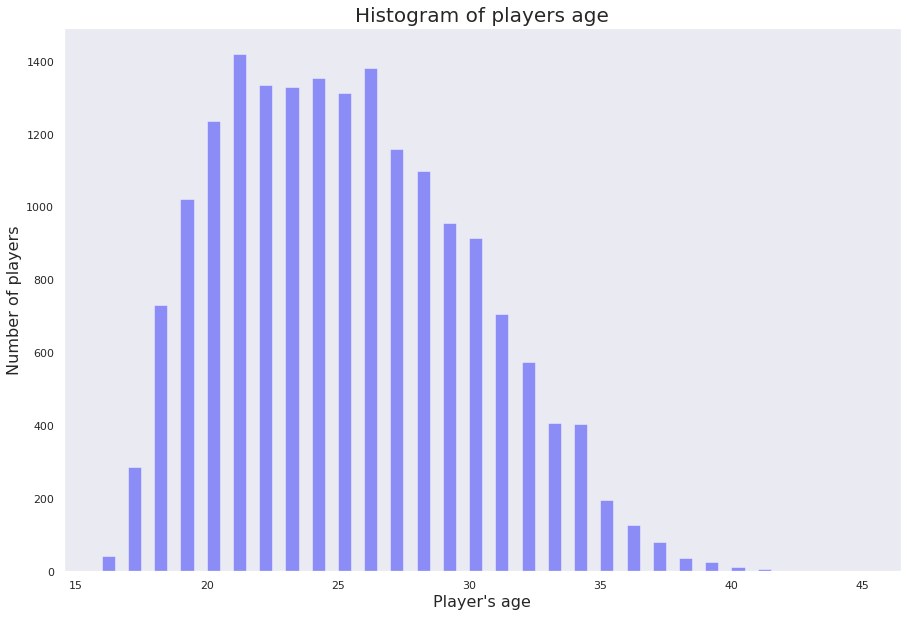

In [ ]:
# Let's plot a histogram to understand the age distribution of players

sns.set(style ="dark", palette="rocket", color_codes=True)
x = fifa.Age
plt.figure(figsize=(15,10))
ax = sns.distplot(x, bins = 58, kde = False, color='b')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

We see that maximum players lie in the age category of 21 to 27

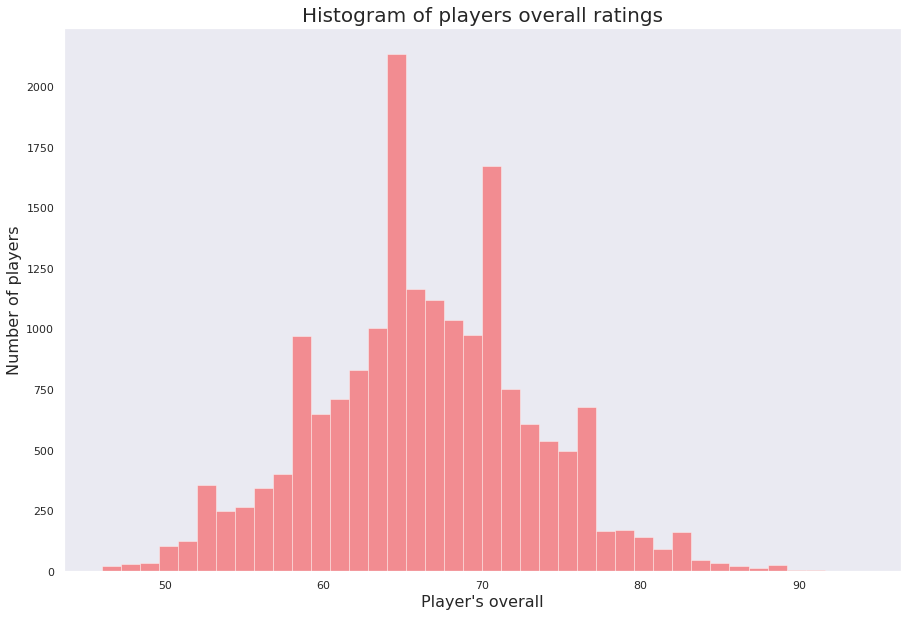

In [ ]:
# Let's plot a histogram to understand the distribution of overall ratings of players

sns.set(style ="dark", palette="rocket", color_codes=True)
x = fifa.Overall
plt.figure(figsize=(15,10))
ax = sns.distplot(x, bins = 40, kde = False, color='r')
ax.set_xlabel(xlabel="Player\'s overall", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players overall ratings', fontsize=20)
plt.show()

We see that the mean of overall ratings is around 65

Text(0.5, 0.98, 'Age vs Sprint')

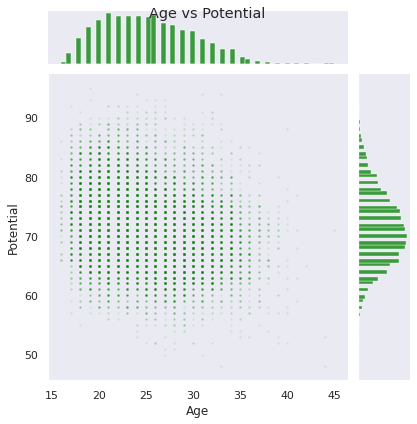

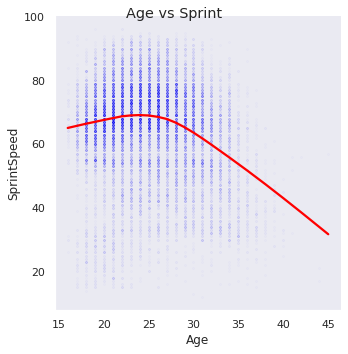

In [ ]:
p=sns.jointplot(x=fifa['Age'],y=fifa['Potential'], 
              joint_kws={'alpha':0.1,'s':5,'color':'green'},
              marginal_kws={'color':'green'})
p.fig.suptitle("Age vs Potential")


q=sns.lmplot(data = fifa, x = 'Age', y = 'SprintSpeed',lowess=True,scatter_kws={'alpha':0.01, 's':5,'color':'blue'}, 
           line_kws={'color':'red'})
q.fig.suptitle("Age vs Sprint")

We see that the potential decreases as the age increases, which is again intuitive.

In [ ]:
fig = tools.make_subplots(rows=1, cols=2)

aa = go.Histogram(x=fifa['Height in Cms'], nbinsx=25, opacity=0.7, name='Height in cms')
bb = go.Histogram(x=fifa['Weight in Pounds'], nbinsx=30, opacity=0.7, name='Weight in Pounds')

fig.append_trace(aa, 1,1)
fig.append_trace(bb, 1,2)

fig['layout'].update(title='<b>Height & Weight Distribution</b>', \
                     xaxis=dict(automargin=True),
                     yaxis=dict(title='<b><i>Count</b></i>')
                    )
py.iplot(fig)

Majority of the players' height lie in the range of 175cms to 190cms.



Majority of the players' weight lie in the range of 150lbs to 174lbs.



---



---


Now we see player distribution across Countries

In [ ]:
df_nations = fifa.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']

df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]

,Nation,Count
46,England,1657
114,Northern Ireland,79
131,Scotland,283
161,Wales,129


In [ ]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()

,Nation,Count
160,Venezuela,66
161,Wales,129
162,Zambia,9
163,Zimbabwe,13
164,United Kingdom,2148


Adding values of England, Northern Ireland, Scotland and Wales under 'United Kingdom', as our choropleth map considers the following countries as a whole which are included in the United Kingdom.


---


We hover over the map to confirm the same.

In [ ]:
countrymap = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[countrymap], layout=layout)
py.iplot(fig)

So we see that most players are from European and South American countries.

Top 5 countries -

Engalnd - 1657

Germany - 1195

Spain - 1071

Argentina - 936

France - 911

Hover over the red spot on the map to get the value of United Kingdom which includes England, Scotland, Northern Ireland and Wales.

In [ ]:
player_features = (
    'Acceleration', 'Aggression', 'Agility', 
    'Balance', 'BallControl', 'Composure', 
    'Crossing', 'Dribbling', 'FKAccuracy', 
    'Finishing', 'GKDiving', 'GKHandling', 
    'GKKicking', 'GKPositioning', 'GKReflexes', 
    'HeadingAccuracy', 'Interceptions', 'Jumping', 
    'LongPassing', 'LongShots', 'Marking', 'Penalties'
)

# We can see the top three features per position:

for i, val in fifa.groupby(fifa['Position'])[player_features].mean().iterrows():
    print('Position {}: {}, {}, {}'.format(i, *tuple(val.nlargest(3).index)))

Position CAM: Balance, Agility, Acceleration
Position CB: Jumping, Aggression, HeadingAccuracy
Position CDM: Aggression, Jumping, Balance
Position CF: Agility, Balance, Acceleration
Position CM: Balance, Agility, Acceleration
Position GK: GKReflexes, GKDiving, GKPositioning
Position LAM: Agility, Balance, Acceleration
Position LB: Acceleration, Balance, Agility
Position LCB: Jumping, Aggression, HeadingAccuracy
Position LCM: Balance, Agility, BallControl
Position LDM: Aggression, BallControl, LongPassing
Position LF: Balance, Agility, Acceleration
Position LM: Acceleration, Agility, Balance
Position LS: Acceleration, Agility, Finishing
Position LW: Acceleration, Agility, Balance
Position LWB: Acceleration, Agility, Balance
Position RAM: Agility, Balance, Acceleration
Position RB: Acceleration, Balance, Jumping
Position RCB: Jumping, Aggression, HeadingAccuracy
Position RCM: Agility, Balance, BallControl
Position RDM: Aggression, Jumping, BallControl
Position RF: Agility, Acceleration, 

Let us simplify the above positions into 4 simple categories of - **Forwards**, **Midfielders**, **Defenders** and **GoalKeepers**

In [ ]:
def position_classifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'Forward'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'Midfielder'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'Defender'
        return val
    
    else:
        return val

In [ ]:
fifa['Position'] = fifa['Position'].apply(position_classifier)
fifa['Position'].value_counts()

Midfielder    7589
Defender      5866
Forward       2667
GK            2025
Name: Position, dtype: int64

Plotting a few visualizations which give us more information about the aggregated positions

In [ ]:
ccc = go.Pie(values=fifa['Position'].value_counts().values,
                labels=fifa['Position'].value_counts().index.values,
                hole=0.3
               )
 

layout = go.Layout(title='<b>Distribution of Players Position-Wise</b>')

fig = go.Figure(data=[ccc], layout=layout)
py.iplot(fig)

<Figure size 864x576 with 0 Axes>

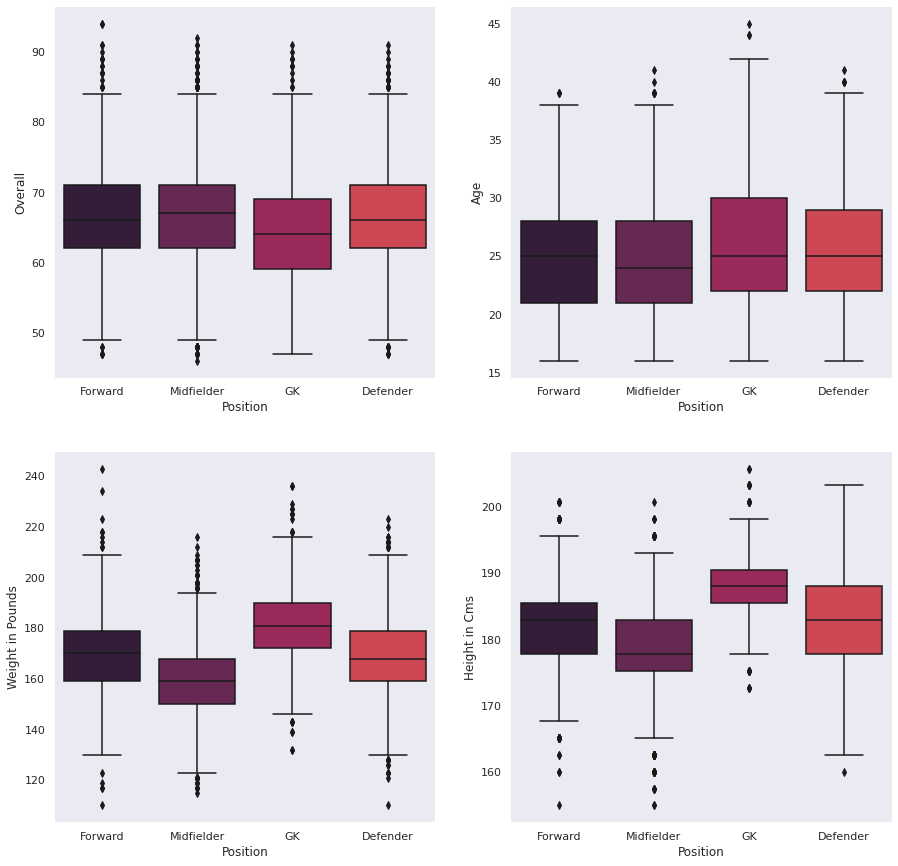

In [ ]:
plt.figure(figsize=(12, 8))


f, axes = plt.subplots(2, 2, figsize=(15, 15), sharex=False)
sns.despine(left=True)

sns.boxplot('Position', 'Overall', data = fifa, ax=axes[0, 0])
sns.boxplot('Position', 'Age', data = fifa, ax=axes[0, 1])

sns.boxplot('Position', 'Height in Cms', data = fifa, ax=axes[1, 1])
sns.boxplot('Position', 'Weight in Pounds', data = fifa, ax=axes[1, 0])

The overall ratings of goalkeepers is slightly low.

---


Defenders & goalkeepers have a smaller deviation in Age.

---


Midfielder tends to be shorter and lighter since they need to be more flexible in passing and dribbling.

---

Also, height and weight of goalkeepers is the most.

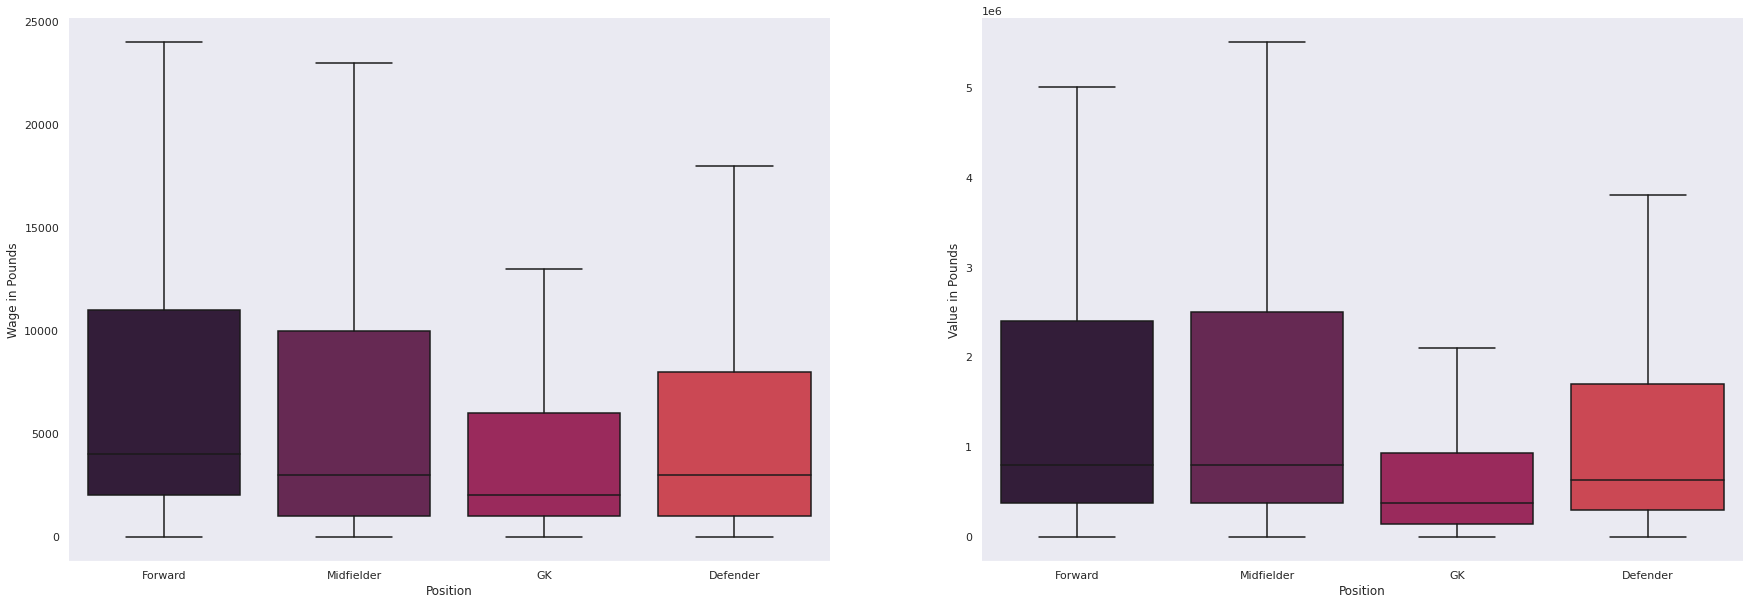

In [ ]:
f, axes = plt.subplots(ncols= 2, figsize=(30, 10), sharex=False)
sns.despine(left=True)

sns.boxplot('Position', 'Wage in Pounds', data = fifa, showfliers=False, ax=axes[0])
sns.boxplot('Position', 'Value in Pounds', data = fifa, showfliers=False, ax=axes[1])

Strikers tend to have the highest wages and value

Goalkeepers have the lowest.

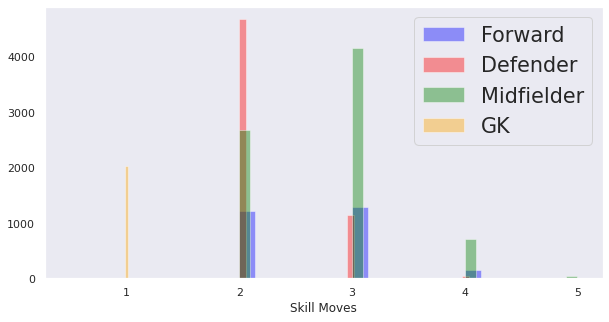

In [ ]:
plt.figure(figsize=(10,5))

a = fifa[fifa['Position'] == 'Forward']
b = fifa[fifa['Position'] == 'Defender']
c = fifa[fifa['Position'] == 'Midfielder']
d = fifa[fifa['Position'] == 'GK']

sns.distplot(a['Skill Moves'], color='blue', label = 'Forward', kde=False)
sns.distplot(b['Skill Moves'], color='red', label = 'Defender',  kde=False)
sns.distplot(c['Skill Moves'], color='green', label = 'Midfielder',  kde=False)
sns.distplot(d['Skill Moves'], color='orange', label = 'GK',  kde=False)

plt.legend(fontsize = 'xx-large')

Defenders & goalkeepers have lower skill moves score compared to Strikers and Midfielders, which could be one of the reasons why Defender & goalkeeper values are less than the other two positions.

In [ ]:
#We are choosing 6 attributes here. We are grouping the data by Position and finding the average of our 6 attributes.
df_skills = fifa.groupby(by='Position')['Crossing', 'Finishing', 'FKAccuracy', 
                            'StandingTackle', 'Marking', 'Interceptions'].mean().reset_index()

In [ ]:
forward = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'Forward'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Forwards'
                         )

midfielder = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'Midfielder'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Midfielders'
                         )

defender = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'Defender'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Defenders'
                         )


goalkeeper = go.Scatterpolar(theta=['Crossing', 'Finishing', 'FKAccuracy', 
                                 'StandingTackle', 'Marking', 'Interceptions',
                                 'Crossing'
                                ],
                          r=df_skills[df_skills['Position'] == 'GK'][['Crossing', 'Finishing', 'FKAccuracy', 
                                                                     'StandingTackle', 'Marking', 'Interceptions',
                                                                     'Crossing'
                                                                    ]].values[0],
                          fill='toself',
                          name='Goal Keepers'
                         )

layout = go.Layout(polar=dict(radialaxis=dict(visible=True,
                                              range=[0, 100]
                                             )
                             
                             ),
                   showlegend=True,
                   title='<b>Attributes by Position</b>'
                  )

fig = go.Figure(data=[forward, midfielder, defender, goalkeeper], layout=layout)
py.iplot(fig)


No surprise with Defenders getting the highest ratings in defending attributes such as StandingTackle, Marking and Interceptions.

Midfielders seem like all rounders. They are good at everything but excel in Crossing and FKAccuracy.

Forwards' main job is to score goals. Hence, it is expected they score the highest in Finishing.


## **Now, we do classification based on player positions**



In [ ]:
#Transforming categorical feature into numeric.
#GoalKeeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
def pos_numeric(val):
    if val == 'GK':
        return 0
    elif val == 'Defender':
        return 1
    elif val == 'Midfielder':
        return 2
    else:
        return 3
    
fifa['Position'] = fifa['Position'].apply(pos_numeric)

#Can also use LabelEncoder from preprocessing package
# label = LabelEncoder()
# y = label.fit_transform(fifa['Positition'])
# label.inverse_transform(y) #this will give you the values back 

In [ ]:
fifa_replica = fifa.copy()

#Dropping unnecessary columns
fifa_replica.drop(columns=['Age','Photo','Name', 'Nationality', 'Flag','Club', 'Club Logo', 'Special', 'Real Face', 
                    'Special', 'Preferred Foot', 'International Reputation', 'Work Rate', 'Body Type', 'Jersey Number',
                   'Contract Valid Until', 'Unnamed: 0','LS','ST','RS','LW','LF','CF','RF','RW','LAM','CAM','RAM','LM','LCM','CM','RCM','RM',
                   'LWB','LDM','CDM','RDM','RWB','LB','LCB','CB','RCB','RB'], inplace=True)

fifa_replica.head().T

,0,1,2,3,4
ID,1.580230e+05,20801.00,1.908710e+05,193080.00,1.929850e+05
Overall,9.400000e+01,94.00,9.200000e+01,91.00,9.100000e+01
Potential,9.400000e+01,94.00,9.300000e+01,93.00,9.200000e+01
Weak Foot,4.000000e+00,4.00,5.000000e+00,3.00,5.000000e+00
Skill Moves,4.000000e+00,5.00,5.000000e+00,1.00,4.000000e+00
Position,3.000000e+00,3.00,2.000000e+00,0.00,2.000000e+00
Crossing,8.400000e+01,84.00,7.900000e+01,17.00,9.300000e+01
Finishing,9.500000e+01,94.00,8.700000e+01,13.00,8.200000e+01
HeadingAccuracy,7.000000e+01,89.00,6.200000e+01,21.00,5.500000e+01
ShortPassing,9.000000e+01,81.00,8.400000e+01,50.00,9.200000e+01


In [ ]:
fifa_replica.shape

(18159, 44)

In [ ]:
X = fifa_replica.drop(columns=['Position'])
X = pd.get_dummies(X)
y = fifa_replica['Position']
X = X.drop(columns=['ID']).reset_index(drop=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#Splitting dataset into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=y)
print(X_train.head())

       Overall  Potential  Weak Foot  Skill Moves  Crossing  Finishing  \
11670       64         72        3.0          3.0      53.0       47.0   
11214       64         64        5.0          2.0      59.0       44.0   
8750        67         67        3.0          3.0      68.0       60.0   
11511       64         64        2.0          2.0      31.0       38.0   
8163        67         67        3.0          2.0      46.0       32.0   

       HeadingAccuracy  ShortPassing  Volleys  Dribbling  ...  SlidingTackle  \
11670             45.0          67.0     48.0       64.0  ...           54.0   
11214             56.0          63.0     56.0       65.0  ...           61.0   
8750              35.0          69.0     52.0       64.0  ...           53.0   
11511             64.0          53.0     31.0       49.0  ...           62.0   
8163              52.0          67.0     48.0       58.0  ...           64.0   

       GKDiving  GKHandling  GKKicking  GKPositioning  GKReflexes  \
11670

#CART

Test Accuracy for CART = 0.8532
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.87      0.88      0.88      1173
           2       0.82      0.83      0.83      1518
           3       0.78      0.75      0.76       536

    accuracy                           0.85      3632
   macro avg       0.87      0.87      0.87      3632
weighted avg       0.85      0.85      0.85      3632



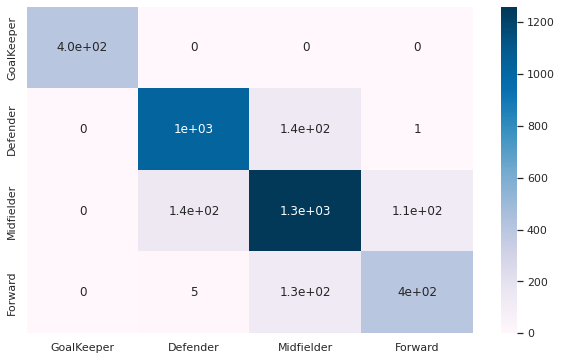

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#modelling
dt_model = DecisionTreeClassifier(min_samples_split=10)
dt_model.fit(X_train, y_train)

#Prediction
y_pred = dt_model.predict(X_test)
c = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

#GoalKeeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
sns.heatmap(c, cmap='PuBu', xticklabels=['GoalKeeper','Defender','Midfielder','Forward'], yticklabels=['GoalKeeper','Defender','Midfielder','Forward'],  annot=True)
sns.set(rc = {'figure.figsize':(10,6)})
print(f"Test Accuracy for CART = {acc:.4f}")
print(classification_report(y_test,y_pred))

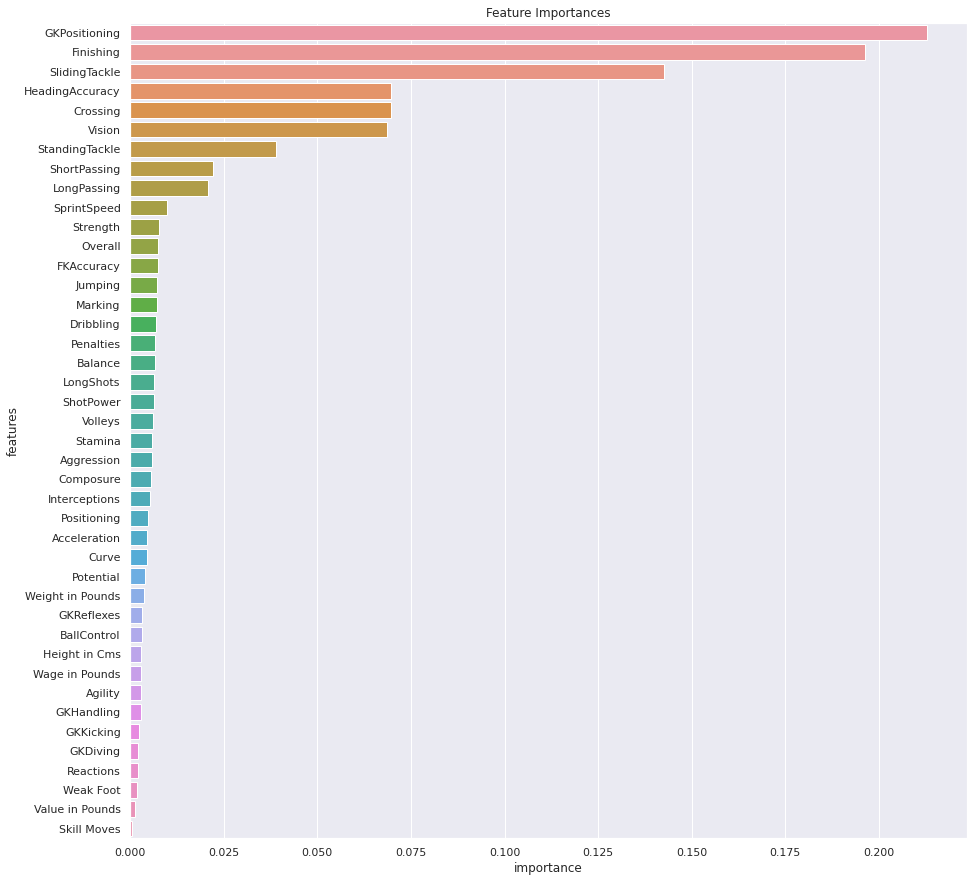

In [ ]:
importance = pd.DataFrame({'features':X_train.columns, 'importance':dt_model.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x=importance['importance'], y=importance['features'], )
sns.set(rc = {'figure.figsize':(15,25)})
plt.title("Feature Importances")
plt.show()

#Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier 

rf_Model = RandomForestClassifier()

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 80, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [2,4]
# Minimum number of samples required to split a node
min_samples_split = [2, 5]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the param grid
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(param_grid)


rf_Grid = GridSearchCV(estimator = rf_Model, param_grid = param_grid, cv = 3, verbose=2, n_jobs =-1)

rf_Grid.fit(X_train, y_train)
print(f"best params: {rf_Grid.best_params_}")


{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['auto', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}
Fitting 3 folds for each of 320 candidates, totalling 960 fits
best params: {'bootstrap': False, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 17}


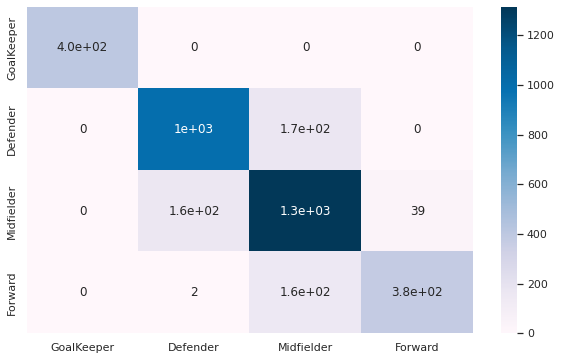

Test Accuracy for Random Forest = 0.8524
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.86      0.85      0.85      1173
           2       0.80      0.87      0.83      1518
           3       0.91      0.71      0.79       536

    accuracy                           0.85      3632
   macro avg       0.89      0.86      0.87      3632
weighted avg       0.86      0.85      0.85      3632



In [ ]:
#Prediction
y_pred = rf_Grid.predict(X_test)
c = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

#GoalKeeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
sns.heatmap(c, cmap='PuBu', xticklabels=['GoalKeeper','Defender','Midfielder','Forward'], yticklabels=['GoalKeeper','Defender','Midfielder','Forward'],  annot=True)
sns.set(rc = {'figure.figsize':(10,6)})
plt.show()
print(f"Test Accuracy for Random Forest = {acc:.4f}")
print(classification_report(y_test,y_pred))

#Gradient Boosting Classifier

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier as gbc


In [ ]:
#Model building and fitting 
model_gbc = gbc(n_estimators=5000, #max trees
                learning_rate=0.05, #rate at which weights with update
                max_depth=3, #Max tree depth
                subsample=0.5, #50% of the obv will be used to build efch tree
                validation_fraction=0.1, #10% of data used for validation 
                n_iter_no_change=30, #will stop if 20 trees show same value
                max_features='log2', #log2 features will be used build trees
                verbose=1) #shows logs

model_gbc.fit(X_train, y_train)

      Iter       Train Loss      OOB Improve   Remaining Time 
         1           1.1667           0.0863            5.48m
         2           1.1002           0.0697            5.68m
         3           1.0293           0.0627            5.95m
         4           0.9875           0.0515            5.93m
         5           0.9356           0.0476            5.92m
         6           0.9011           0.0370            6.05m
         7           0.8622           0.0388            6.02m
         8           0.8213           0.0346            6.13m
         9           0.7911           0.0315            6.20m
        10           0.7659           0.0260            6.18m
        20           0.5653           0.0128            6.23m
        30           0.4613           0.0081            5.54m
        40           0.3895           0.0051            5.15m
        50           0.3531           0.0031            4.92m
        60           0.3235           0.0030            4.77m
       

GradientBoostingClassifier(learning_rate=0.05, max_features='log2',
                           n_estimators=5000, n_iter_no_change=30,
                           subsample=0.5, verbose=1)

In [ ]:
print(f"Number of trees created by Gradient Boosting: {len(model_gbc.estimators_)}")

Number of trees created by Gradient Boosting: 385


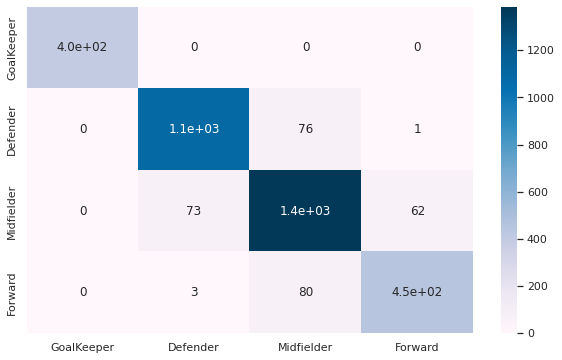

Test Accuracy for Grandient Boosting = 0.9188
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.94      0.93      0.93      1173
           2       0.90      0.91      0.90      1518
           3       0.88      0.85      0.86       536

    accuracy                           0.92      3632
   macro avg       0.93      0.92      0.93      3632
weighted avg       0.92      0.92      0.92      3632



In [ ]:
#Prediction
y_pred = model_gbc.predict(X_test)
c = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

#GoalKeeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
sns.heatmap(c, cmap='PuBu', xticklabels=['GoalKeeper','Defender','Midfielder','Forward'], yticklabels=['GoalKeeper','Defender','Midfielder','Forward'],  annot=True)
sns.set(rc = {'figure.figsize':(10,6)})
plt.show()
print(f"Test Accuracy for Grandient Boosting = {acc:.4f}")
print(classification_report(y_test,y_pred))

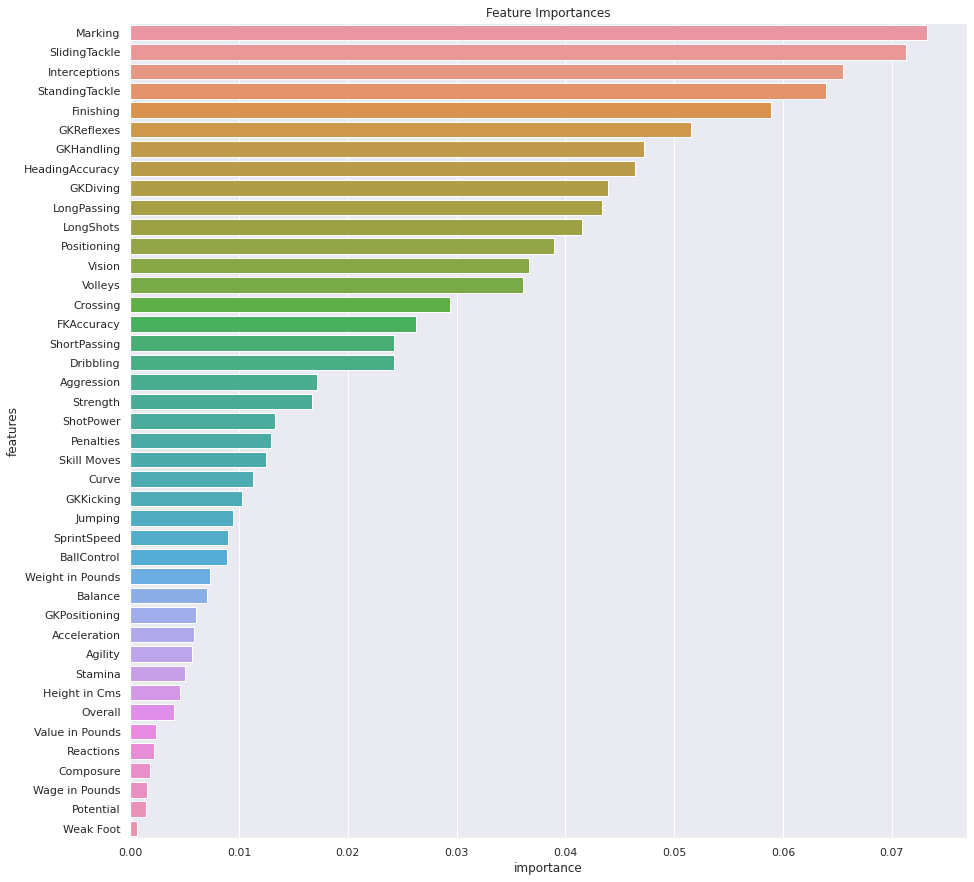

In [ ]:
importance = pd.DataFrame({'features':X_train.columns, 'importance':model_gbc.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x=importance['importance'], y=importance['features'], )
sns.set(rc = {'figure.figsize':(15,15)})
plt.title("Feature Importances")
plt.show()

# Xtreme Gradient Boosting

In [ ]:
from xgboost import XGBClassifier as xgb

In [ ]:
len(X_train)
len(y_train)

14527

In [ ]:
model_xgb = xgb(objective='multi:softprob', #if we don't pass objective it will automatically detect it
                learning_rate=0.05,
                max_depth=10,
                n_estimators=5000,
                subsample=0.5,
                colsample_bytree=0.5, #how many features should be used randomly to create each tree
                verbosity=1) 

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=21, stratify=y_train)
val_set = [(X_val, y_val)]


In [ ]:
model_xgb.fit(X_train_new, y_train_new,
              early_stopping_rounds=20,
              eval_set=val_set,
              verbose=1)

[0]	validation_0-merror:0.15554
Will train until validation_0-merror hasn't improved in 20 rounds.
[1]	validation_0-merror:0.135582
[2]	validation_0-merror:0.133517
[3]	validation_0-merror:0.123882
[4]	validation_0-merror:0.119064
[5]	validation_0-merror:0.117688
[6]	validation_0-merror:0.115623
[7]	validation_0-merror:0.113558
[8]	validation_0-merror:0.107364
[9]	validation_0-merror:0.108052
[10]	validation_0-merror:0.108052
[11]	validation_0-merror:0.108741
[12]	validation_0-merror:0.106676
[13]	validation_0-merror:0.106676
[14]	validation_0-merror:0.105988
[15]	validation_0-merror:0.104611
[16]	validation_0-merror:0.105988
[17]	validation_0-merror:0.105988
[18]	validation_0-merror:0.104611
[19]	validation_0-merror:0.102546
[20]	validation_0-merror:0.105299
[21]	validation_0-merror:0.103235
[22]	validation_0-merror:0.101858
[23]	validation_0-merror:0.103235
[24]	validation_0-merror:0.101858
[25]	validation_0-merror:0.099105
[26]	validation_0-merror:0.099794
[27]	validation_0-merror:0

XGBClassifier(colsample_bytree=0.5, learning_rate=0.05, max_depth=10,
              n_estimators=5000, objective='multi:softprob', subsample=0.5)

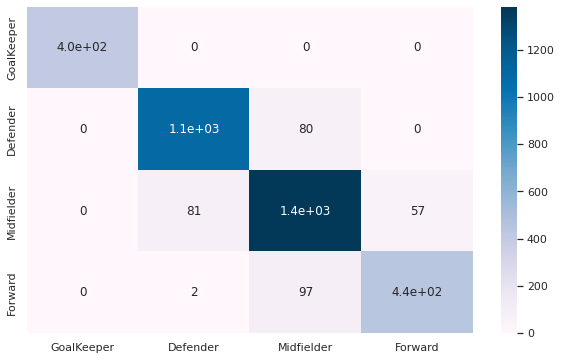

Test Accuracy for Extreme Grandient Boosting = 0.9127
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.93      0.93      0.93      1173
           2       0.89      0.91      0.90      1518
           3       0.88      0.82      0.85       536

    accuracy                           0.91      3632
   macro avg       0.93      0.91      0.92      3632
weighted avg       0.91      0.91      0.91      3632



In [ ]:
#Prediction
y_pred = model_xgb.predict(X_test)
c = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

#GoalKeeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
sns.heatmap(c, cmap='PuBu', xticklabels=['GoalKeeper','Defender','Midfielder','Forward'], yticklabels=['GoalKeeper','Defender','Midfielder','Forward'],  annot=True)
sns.set(rc = {'figure.figsize':(10,6)})
plt.show()
print(f"Test Accuracy for Extreme Grandient Boosting = {acc:.4f}")
print(classification_report(y_test,y_pred))

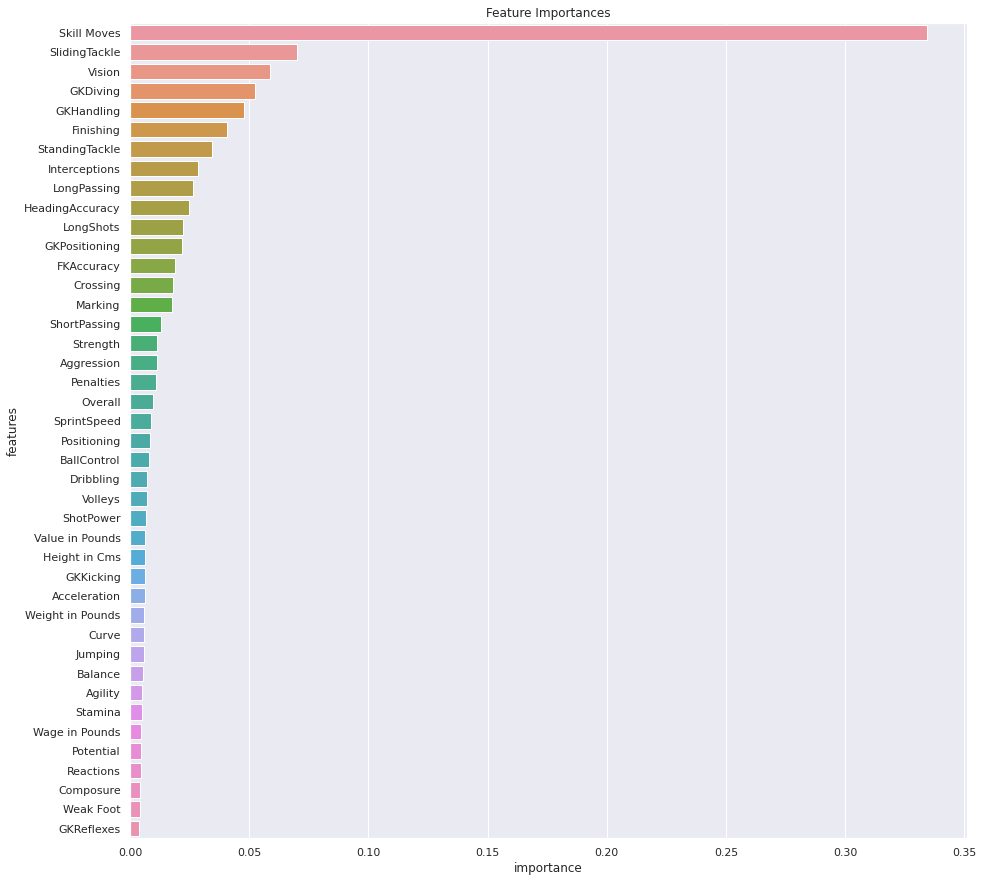

In [ ]:
importance = pd.DataFrame({'features':X_train.columns, 'importance':model_xgb.feature_importances_})
importance.sort_values('importance', ascending=False, inplace=True)
sns.barplot(x=importance['importance'], y=importance['features'], )
sns.set(rc = {'figure.figsize':(15,30)})
plt.title("Feature Importances")
plt.show()

In [ ]:
#hyper parameter tuning 

lr = [0.02,0.05,0.1]
max_depth = [2,3,5]
n_estimators = [1000,2000,3000]

params_dict = {'learning_rate':lr,
               'max_depth':max_depth,
               'n_estimators':n_estimators}


xgb_cv = GridSearchCV(model_xgb, param_grid=params_dict, cv=2)

xgb_cv.fit(X_train_new, y_train_new)

GridSearchCV(cv=2,
             estimator=XGBClassifier(colsample_bytree=0.5, learning_rate=0.05,
                                     max_depth=10, n_estimators=5000,
                                     objective='multi:softprob',
                                     subsample=0.5),
             param_grid={'learning_rate': [0.02, 0.05, 0.1],
                         'max_depth': [2, 3, 5],
                         'n_estimators': [1000, 2000, 3000]})

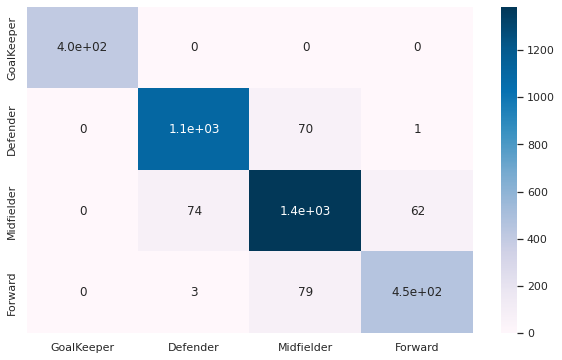

Test Accuracy for Extreme Grandient Boosting = 0.9204
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       405
           1       0.93      0.94      0.94      1173
           2       0.90      0.91      0.91      1518
           3       0.88      0.85      0.86       536

    accuracy                           0.92      3632
   macro avg       0.93      0.92      0.93      3632
weighted avg       0.92      0.92      0.92      3632



In [ ]:
#Prediction
y_pred = xgb_cv.predict(X_test)
c = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test,y_pred)

#GoalKeeper = 0
#Defender = 1
#Midfielder = 2
#Forward = 3
sns.heatmap(c, cmap='PuBu', xticklabels=['GoalKeeper','Defender','Midfielder','Forward'], yticklabels=['GoalKeeper','Defender','Midfielder','Forward'],  annot=True)
sns.set(rc = {'figure.figsize':(10,6)})
plt.show()
print(f"Test Accuracy for Extreme Grandient Boosting = {acc:.4f}")
print(classification_report(y_test,y_pred))